In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
# shape of the data
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data = 60.000 images <br>
Test data = 10.000 images

Image dimension -> 28 x 28

In [4]:
# printing the first image
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

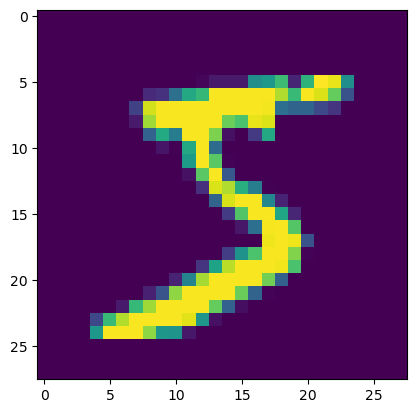

5


In [5]:
plt.imshow(X_train[0])
plt.show()

print(y_train[0])

In [6]:
print(y_train.shape, y_test.shape)

(60000,) (10000,)


In [7]:
print(np.unique(y_train))
print(np.unique(y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
# scaling the values
X_train = X_train/255
X_train = X_train/255

print(X_train[0])

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00

In [9]:
# setting up the layers of the Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

C:\Users\aryas\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 845us/step - accuracy: 0.5407 - loss: 1.5057
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 825us/step - accuracy: 0.8531 - loss: 0.4922
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.8836 - loss: 0.3938
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - accuracy: 0.8975 - loss: 0.3469
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 892us/step - accuracy: 0.9055 - loss: 0.3176
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 891us/step - accuracy: 0.9132 - loss: 0.2943
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 877us/step - accuracy: 0.9195 - loss: 0.2729
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 889us/step - accuracy: 0.9246 - loss: 0.2540
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.9301 - loss: 0.2375
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 866us/step - accuracy: 0.9338 - loss: 0.2235
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 871us/step - accuracy: 0.9380 - loss: 0.2114
Epoch 12

Training data accuracy = 94.8%

In [12]:
loss, accuracy = model.evaluate(X_test, y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - accuracy: 0.8807 - loss: 8582.3105
0.8938999772071838


Testing data accuracy = 89.3%

In [13]:
print(X_test.shape)

(10000, 28, 28)


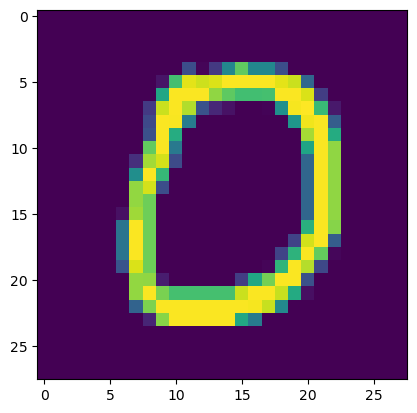

In [14]:
plt.imshow(X_test[10])
plt.show()

In [15]:
print(y_test[10])

0


In [16]:
y_pred = model.predict(X_test)

print(y_pred.shape)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
(10000, 10)


In [17]:
print(y_pred[10])

[1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]


In [21]:
pred_label = np.argmax(y_pred[10])
print(pred_label)

0


In [22]:
y_pred_labels = [np.argmax(i) for i in y_pred]
# print(y_pred_labels)

Text(0.5, 47.7222222222222, 'Predicted Labels')

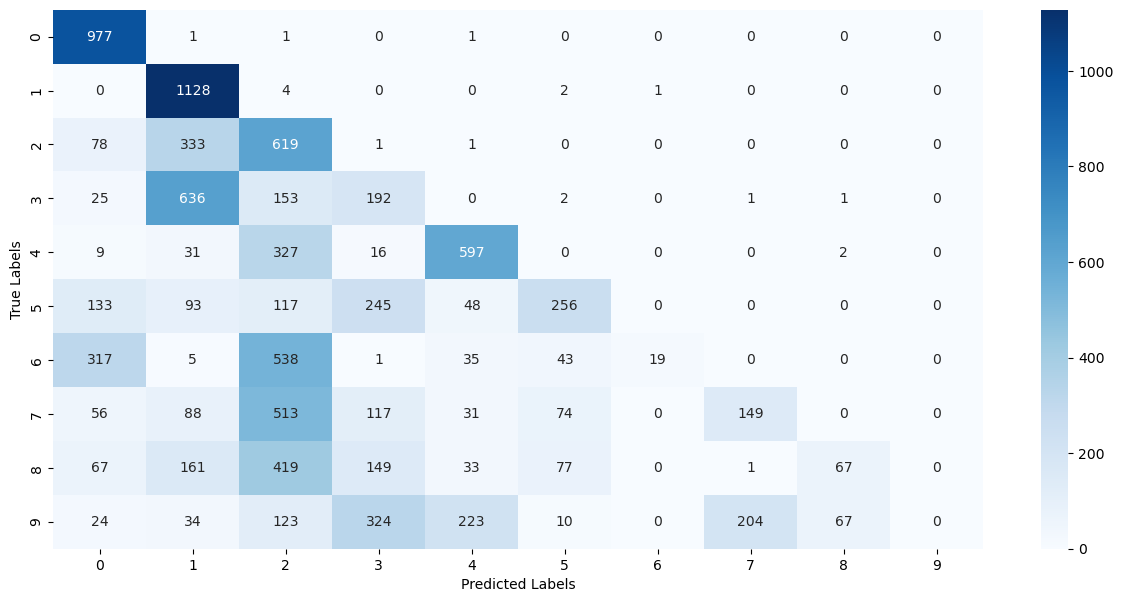

In [20]:
conf_mat = confusion_matrix(y_test, y_pred_labels)

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

In [23]:
!jupyter nbconvert --to html "./MNIST_Digit_Classification_using_Deep_Learning.ipynb" --output-dir="./HTML Files/"

[NbConvertApp] Converting notebook ./MNIST_Digit_Classification_using_Deep_Learning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 402100 bytes to HTML Files\MNIST_Digit_Classification_using_Deep_Learning.html
